In [2]:
from vertexai.language_models import TextEmbeddingInput, TextEmbeddingModel

from google.api_core import retry

import pandas as pd
import seaborn as sns

In [2]:
retry_policy = retry.Retry(predicate=retry.if_transient_error)

def retry_with_policy(retry_policy):
    def decorator(func):
        def wrapper(*args, **kwargs):
            return retry_policy(func)(*args, **kwargs)
        return wrapper
    return decorator

@retry_with_policy(retry_policy)
def get_embeddings_with_retry(model, inputs):
    return model.get_embeddings(inputs)

In [5]:
task = "SEMANTIC_SIMILARITY"
texts = [
    'The quick brown fox jumps over the lazy dog.',
    'The quick rbown fox jumps over the lazy dog.',
    'teh fast fox jumps over the slow woofer.',
    'a quick brown fox jmps over lazy dog.',
    'brown fox jumping over dog',
    'fox > dog',
    # Alternative pangram for comparison:
    'The five boxing wizards jump quickly.',
    # Unrelated text, also for comparison:
    'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vivamus et hendrerit massa. Sed pulvinar, nisi a lobortis sagittis, neque risus gravida dolor, in porta dui odio vel purus.',
]

model = TextEmbeddingModel.from_pretrained('text-embedding-004')
inputs = [TextEmbeddingInput(text, task) for text in texts]
embeddings = model.get_embeddings(inputs)


In [7]:
responses = [embed.values for embed in embeddings]

In [11]:
def truncate(text, limit = 50):
    t = text if len(text) < 50 else text[:limit-3] + "..."
    return t

In [17]:
truncated_texts = [truncate(t) for t in texts]

In [18]:
df = pd.DataFrame(responses, index=truncated_texts)

<Axes: >

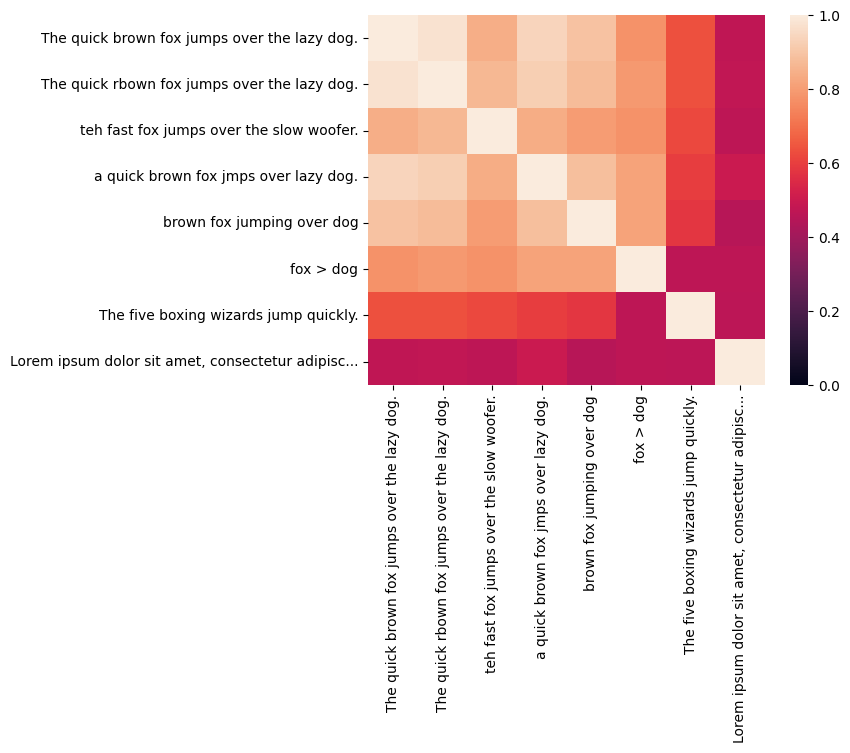

In [20]:
sns.heatmap((sim := df @ df.T), vmin=0, vmax=1)

In [21]:
!python -V

Python 3.12.4


In [22]:
sim['The quick brown fox jumps over the lazy dog.'].sort_values(ascending=False)

The quick brown fox jumps over the lazy dog.          0.999999
The quick rbown fox jumps over the lazy dog.          0.975865
a quick brown fox jmps over lazy dog.                 0.939649
brown fox jumping over dog                            0.894246
teh fast fox jumps over the slow woofer.              0.841842
fox > dog                                             0.775911
The five boxing wizards jump quickly.                 0.635654
Lorem ipsum dolor sit amet, consectetur adipisc...    0.472329
Name: The quick brown fox jumps over the lazy dog., dtype: float64